In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten , BatchNormalization, Dropout

In [ ]:
#generators (for breaking large files into batches)

train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256, 256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256, 256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
# Normalize (to make 0-255 indexing to 0-1)

def process(image, label):
  image = tf.cast(image/255, tf.float32)
  return image, label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [ ]:
# Create CNN Model

model = Sequential()

model.add(Conv2D(32, kernel_size = (3, 3), padding = 'valid', activation = 'relu', input_shape = (256, 256, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2, 3), strides = 2, padding = 'valid'))

model.add(Conv2D(64, kernel_size = (3, 3), padding = 'valid', activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2, 3), strides = 2, padding = 'valid'))

model.add(Conv2D(128, kernel_size = (3, 3), padding = 'valid', activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2, 3), strides = 2, padding = 'valid'))

model.add(Flatten())

model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation = 'sigmoid'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization_3 (Batc  (None, 254, 254, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 127, 126, 32)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 124, 64)      18496     
                                                                 
 batch_normalization_4 (Batc  (None, 125, 124, 64)     256       
 hNormalization)                                                 
                                                      

In [ ]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
history = model.fit(train_ds, epochs = 10, validation_data = validation_ds)

Epoch 1/10
625/625 [==============================] - 73s 116ms/step - loss: 1.6269 - accuracy: 0.5910 - val_loss: 0.6176 - val_accuracy: 0.6386
Epoch 2/10
625/625 [==============================] - 72s 115ms/step - loss: 0.5878 - accuracy: 0.6838 - val_loss: 0.5393 - val_accuracy: 0.7282
Epoch 3/10
625/625 [==============================] - 73s 116ms/step - loss: 0.5308 - accuracy: 0.7226 - val_loss: 0.5433 - val_accuracy: 0.7464
Epoch 4/10
625/625 [==============================] - 72s 115ms/step - loss: 0.4776 - accuracy: 0.7560 - val_loss: 0.5538 - val_accuracy: 0.7362
Epoch 5/10
625/625 [==============================] - 72s 115ms/step - loss: 0.4255 - accuracy: 0.7830 - val_loss: 0.4140 - val_accuracy: 0.8094
Epoch 6/10
625/625 [==============================] - 73s 116ms/step - loss: 0.3909 - accuracy: 0.8049 - val_loss: 0.5035 - val_accuracy: 0.7824
Epoch 7/10
625/625 [==============================] - 72s 115ms/step - loss: 0.3500 - accuracy: 0.8203 - val_loss: 0.4366 - val_ac

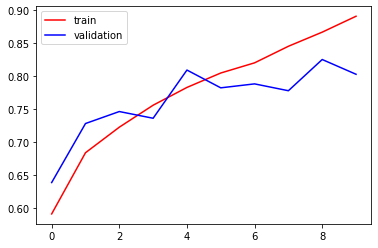

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], color = 'red', label = 'train')
plt.plot(history.history['val_accuracy'], color = 'blue', label = 'validation')
plt.legend()
plt.show()

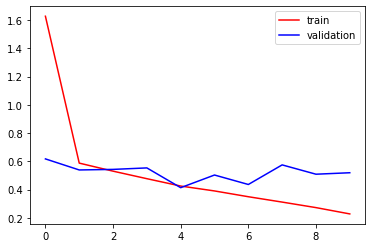

In [ ]:
plt.plot(history.history['loss'], color = 'red', label = 'train')
plt.plot(history.history['val_loss'], color = 'blue', label = 'validation')
plt.legend()
plt.show()

In [ ]:

# ways to reduce overfitting

# Add more data
# Data Augmentation
# L1/ L2 Regularizer
# Dropout
# Batch Norm
# Reduce Complexity

In [ ]:
import cv2

In [ ]:
test_img = cv2.imread('/content/dog.jpg')

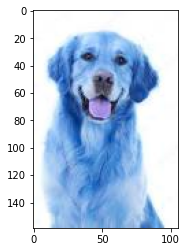

In [ ]:
plt.imshow(test_img)

In [ ]:
test_img.shape

(159, 106, 3)

In [ ]:
test_img = cv2.resize(test_img, (256, 256))



In [ ]:
test_input = test_img.reshape((1, 256, 256, 3))

In [ ]:
# 0 means dog and 1 means cat

model.predict(test_input)


array([[0.]], dtype=float32)